In [75]:
import os
import glob
import json
from pprint import pprint
import collections
from operator import itemgetter, attrgetter, methodcaller
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
# get a list of files
list_of_files = []

for root, dirs, files in os.walk("/Users/Dai/Desktop/Course/Capstone/midterm1/lastfm_subset"):
    for file in files:
        if file.endswith(".json"):
            list_of_files.append(os.path.join(root, file))            

In [3]:
list_of_files[0]

'/Users/Dai/Desktop/Course/Capstone/midterm1/lastfm_subset/A/A/A/TRAAAAW128F429D538.json'

In [4]:
# get contents from files
with open(list_of_files[0]) as json_data:
    d = json.loads(json_data.read())
    json_data.close()
    pprint(d)

{u'artist': u'Casual',
 u'similars': [[u'TRABACN128F425B784', 0.871737],
               [u'TRIAINV12903CB4943', 0.751301],
               [u'TRJYGLF12903CB4952', 0.751052],
               [u'TRVNXHF128F93134F0', 0.582662],
               [u'TRWJMMB128F429D550', 0.508661],
               [u'TRUEULA128F425B7DB', 0.404535],
               [u'TRIEUIZ128F427973B', 0.028357],
               [u'TRWNLAW128F9364539', 0.0278891],
               [u'TRWIMTU128F148D424', 0.0227976],
               [u'TRPTKMG128F930E997', 0.0198059],
               [u'TRQIPME12903CE0A48', 0.0161872],
               [u'TRAOGGC128F4215EB5', 0.0158649],
               [u'TROIDMT128F428ED1F', 0.0158644],
               [u'TRAKXGR128F428686F', 0.0156715],
               [u'TRQKESV128F428B3AC', 0.0155405],
               [u'TRCRZMU128F931E6C0', 0.0154048],
               [u'TRKDOBN12903D0C783', 0.0152418],
               [u'TRXVODK12903D0C786', 0.0152418],
               [u'TRIVHFX12903D0CCF0', 0.0145524],
               

In [5]:
d[u'tags']

[[u'Bay Area', u'100'],
 [u'hieroglyiphics', u'100'],
 [u'classic', u'50'],
 [u'Hip-Hop', u'50'],
 [u'stream', u'50'],
 [u'OG', u'50'],
 [u'1979-2006: A Hip-Hop Odyssey - 800 Tracks In A 48 Minute Mix', u'50'],
 [u'heiroglyphics', u'50'],
 [u'oaksterdamn', u'50'],
 [u'heard on Pandora', u'0']]

In [6]:
# calculate a dictionary of whole tag set.
tags_list = []
for fileName in list_of_files:
    with open(fileName) as json_data:
        d = json.loads(json_data.read())
        json_data.close()
        tags_list.append(d[u'tags'])

In [7]:
# number of tracks in subset
len(tags_list)

9330

In [8]:
tags_dict = {}
for track in tags_list:
    for tags in track:
        tag = tags[0]
        if tag in tags_dict:
            tags_dict[tag] += 1
        else:
            tags_dict[tag] = 1

In [32]:
od = collections.OrderedDict(sorted(tags_dict.items(), key=itemgetter(1), reverse = True))
od[u'rock']

1161

In [10]:
len(tags_dict)

33355

In [35]:
l = []
for item in od:
    l.append(od[item])

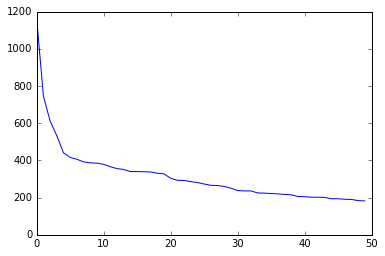

In [44]:
plt.plot(l[:50])

In [68]:
tags_all = []
cannot = 0
for fileName in list_of_files:
    with open(fileName) as json_data:
        d = json.loads(json_data.read())
        json_data.close()
        tags = d[u'tags']
        for tag in tags:
            #if isinstance(tag[0], unicode):
            #   tags_all.append(tag[0].encode('ascii'))
            try:
                content = tag[0].encode('ascii')
                tags_all.append(content)
            except:
                cannot += 1

In [72]:
energy = pd.DataFrame({'word': tags_all})
energy.to_csv('tags.csv', index=False)

In [73]:
#tags_list

### group in 4 catagory

In [81]:
# calculate a dictionary of whole tag set.
tags_dict['happy'], tags_dict['fun'], tags_dict['upbeat'], tags_dict['summer'], tags_dict['sweet'], tags_dict['Guilty Pleasures'], tags_dict['Dreamy']

(134, 165, 135, 106, 92, 67, 56)

In [82]:
tags_dict['sad'], tags_dict['emo'], tags_dict['melancholy'], tags_dict['dark'], tags_dict['nostalgia']

(159, 136, 117, 77, 58)

In [85]:
tags_dict['relax']+tags_dict['relaxing'], tags_dict['chill']+tags_dict['chillout'], tags_dict['Mellow'], tags_dict['easy listening'], tags_dict['ambient'], tags_dict['smooth'], tags_dict['trance'], tags_dict['Dreamy']

(237, 533, 266, 148, 145, 99, 64, 56)

In [90]:
tags_dict['energy'], tags_dict['dance'], tags_dict['party'], tags_dict['upbeat'],  tags_dict['fun'], tags_dict['club'], tags_dict['powerful']

(39, 351, 172, 135, 165, 63, 53)

In [ ]:
for fileName in list_of_files:
    with open(fileName) as json_data:
        d = json.loads(json_data.read())
        json_data.close()
        tags_list.append(d[u'tags'])

# tag selected:

### happy, sad, relaxing, energetic

In [118]:
happyID = []
for fileName in list_of_files:
    with open(fileName) as json_data:
        d = json.loads(json_data.read())
        json_data.close()
        tags = d[u'tags']
        for tag in tags:
            if u'energetic' in tag or u'Energetic' in tag:
                happyID.append(d[u'track_id'].encode('ascii'))

In [119]:
len(happyID)

97